In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('cv_programmers.csv', encoding='windows-1251', index_col=[0])

In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,...,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,...,"[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,7800000000000,...,"[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,5600000200000,...,"[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
3,02ec5b90-658a-11ed-8193-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,1600000000000,NaN,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,1600000100000,...,[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Татарстан,-г.-Казань"
4,029ebe60-e0d0-11ec-a466-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,5700000000000,NaN,Техник-программист,2022-05-31T13:54:14+0300,2022-05-31T13:56:04+0300,5701700100000,...,[],"[{""diploma_name"": ""Разработка системы дистанци...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...","[{""hard_skill_name"": ""умение работать в команд...","[{""owner_id"": ""029ebe60-e0d0-11ec-a466-839f0d9...","Орловская-область,-г.-Новосиль"


In [5]:
df.shape

(425, 47)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             425 non-null    object 
 1   abilympics_inspection_status   425 non-null    object 
 2   abilympics_participation       425 non-null    bool   
 3   worldskills_inspection_status  425 non-null    object 
 4   state_region_code              425 non-null    int64  
 5   regionNameTerm                 0 non-null      float64
 6   position_name                  425 non-null    object 
 7   date_create                    425 non-null    object 
 8   date_modify                    425 non-null    object 
 9   home_city_code                 425 non-null    int64  
 10  education                      367 non-null    object 
 11  academic_degree                0 non-null      float64
 12  drive_license                  425 non-null    obj

In [7]:
df.describe()

,state_region_code,regionNameTerm,home_city_code,academic_degree,experience,salary,publication_period,code_external_system,fullness_rate
count,4.250000e+02,0.0,4.250000e+02,0.0,425.000000,425.000000,425.0,0.0,425.000000
mean,4.487059e+12,NaN,4.487466e+12,NaN,3.296471,46426.835294,0.0,NaN,66.891765
std,2.501754e+12,NaN,2.501793e+12,NaN,6.191642,40432.473215,0.0,NaN,14.335684
min,1.000000e+11,NaN,1.000002e+11,NaN,0.000000,0.000000,0.0,NaN,0.000000
25%,2.300000e+12,NaN,2.300000e+12,NaN,0.000000,25000.000000,0.0,NaN,61.000000
50%,5.000000e+12,NaN,5.000003e+12,NaN,1.000000,40000.000000,0.0,NaN,67.000000
75%,6.600000e+12,NaN,6.600001e+12,NaN,4.000000,50000.000000,0.0,NaN,75.000000
max,9.100000e+12,NaN,9.101200e+12,NaN,52.000000,350000.000000,0.0,NaN,100.000000


Проверю пропуски

In [8]:
df.isna().sum()

id                                 0
abilympics_inspection_status       0
abilympics_participation           0
worldskills_inspection_status      0
state_region_code                  0
regionNameTerm                   425
position_name                      0
date_create                        0
date_modify                        0
home_city_code                     0
education                         58
academic_degree                  425
drive_license                      0
code_country                       0
nark_inspection_status             0
nark_certificate                 420
published_date                     4
schedule_type                      0
experience                         0
salary                             0
professional_skills              397
add_skills                       405
busy_type                          0
business_trip                      0
id_candidate                       0
other_certificates               388
retraining_capability              0
o

Пройдусь по интересующим меня столбцам, чтобы определить какие значения каждый из них содержит

In [9]:
df['abilympics_inspection_status'].unique()

array(['UNKNOWN'], dtype=object)

In [10]:
df['abilympics_participation'].unique()

array([False,  True])

In [11]:
df['worldskills_inspection_status'].unique()

array(['NOT_APPLICABLE', 'WAITING'], dtype=object)

In [12]:
df['drive_license']

0         []
1         []
2         []
3         []
4         []
       ...  
420    ['B']
421    ['B']
422       []
423       []
424       []
Name: drive_license, Length: 425, dtype: object

In [13]:
df['code_country'].unique()

array(['RU', 'BY'], dtype=object)

In [14]:
df['nark_inspection_status'].unique()

array(['NOT_APPLICABLE', 'FAILURE', 'WAITING'], dtype=object)

In [15]:
df['nark_certificate'].unique()

array([nan, 'Свидетельство-о-независимой-оценке-квалификации'],
      dtype=object)

In [16]:
df['business_trip'].unique()

array(['Готов-к-командировкам', 'Не-готов-к-командировкам'], dtype=object)

In [17]:
df['retraining_capability'].unique()

array(['Готов-к-переобучению', 'Не-готов-к-переобучению'], dtype=object)

In [18]:
df['publication_period'].unique()

array([0.])

In [19]:
df['rf_citizen'].unique()

array([ True, False])

In [20]:
df['status'].unique()

array(['ACCEPTED', 'REJECTED'], dtype=object)

In [21]:
df['visibility'].unique()

array(['VISIBLE_TO_ALL'], dtype=object)

In [22]:
df['deleted'].unique()

array([False])

Исходя из всего этого можно убрать из таблицы определенные столбцы:

In [23]:
df.drop(columns=['regionNameTerm','academic_degree','code_external_system','abilympics_inspection_status',
                 'publication_period','visibility','deleted'], inplace=True)

In [24]:
df.isna().sum()

id                                 0
abilympics_participation           0
worldskills_inspection_status      0
state_region_code                  0
position_name                      0
date_create                        0
date_modify                        0
home_city_code                     0
education                         58
drive_license                      0
code_country                       0
nark_inspection_status             0
nark_certificate                 420
published_date                     4
schedule_type                      0
experience                         0
salary                             0
professional_skills              397
add_skills                       405
busy_type                          0
business_trip                      0
id_candidate                       0
other_certificates               388
retraining_capability              0
other_info                       417
id_user                            0
rf_citizen                         0
s

Теперь можно поработать с пропусками в датасете

Существуют определенные столбцы, которые кандидаты оставляли пустыми, поэтому в этих столбцах есть значения " [] ", которые и являются пропусками. Заменю во всех столбцах с " [] " эти значения на Nan'ы

In [25]:
bad_cols = ['drive_license','workExperienceList','educationList','additionalEducationList',
            'desirableRelocationRegions','worldskills','languageKnowledge',
            'hardSkills','softSkills']

In [26]:
for i in bad_cols:
    df[i].replace('[]', np.nan, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             425 non-null    object
 1   abilympics_participation       425 non-null    bool  
 2   worldskills_inspection_status  425 non-null    object
 3   state_region_code              425 non-null    int64 
 4   position_name                  425 non-null    object
 5   date_create                    425 non-null    object
 6   date_modify                    425 non-null    object
 7   home_city_code                 425 non-null    int64 
 8   education                      367 non-null    object
 9   drive_license                  73 non-null     object
 10  code_country                   425 non-null    object
 11  nark_inspection_status         425 non-null    object
 12  nark_certificate               5 non-null      object
 13  publi

Исходя из того, что пропуски есть только в номинативных переменных можно, не беспокоясь, заменять их все на "Информация_отсутствует"

In [28]:
df.fillna('Информация_отсутствует', inplace=True)

Для столбца drive_license изменю значения на более удобные, без лишних знаков

In [29]:
df['drive_license'].unique()

array(['Информация_отсутствует', "['B']", "['B',-'C']", "['A',-'B']"],
      dtype=object)

In [30]:
df['drive_license'] = df['drive_license'].str.replace(",",'')
df['drive_license'] = df['drive_license'].str.replace("'",'')
df['drive_license'] = df['drive_license'].str.replace("[",'')
df['drive_license'] = df['drive_license'].str.replace("]",'')

C:\Users\ilyap\AppData\Local\Temp\ipykernel_16868\462504329.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['drive_license'] = df['drive_license'].str.replace("[",'')
C:\Users\ilyap\AppData\Local\Temp\ipykernel_16868\462504329.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['drive_license'] = df['drive_license'].str.replace("]",'')


In [31]:
df['drive_license'].unique()

array(['Информация_отсутствует', 'B', 'B-C', 'A-B'], dtype=object)

Теперь стоит поработать с переменными времени

В столбце published_date есть пропуски

In [32]:
df[df['published_date']=='Информация_отсутствует']

,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,...,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
90,10d64490-d109-11ea-a23d-b905beff6f7a,False,NOT_APPLICABLE,1600000000000,"Программист,-контент-менеджер",2020-07-28T22:32:25+0300,2021-11-06T02:01:01+0300,1600000100000,Среднее-профессиональное,Информация_отсутствует,...,"[{""company_name"": ""Букет столицы"", ""date_from""...","[{""diploma_name"": ""Технология разработки прогр...","[{""graduate_year"": 2017, ""name"": ""Парикмахер У...",Информация_отсутствует,"[{""contact_type"": ""Телефон"", ""is_moderated"": t...",Информация_отсутствует,"[{""code_language"": ""Татарский"", ""level"": ""Своб...",Информация_отсутствует,Информация_отсутствует,"Республика-Татарстан,-г.-Казань"
123,14a5f590-0bcb-11ec-bcab-e736a3d3ed84,False,NOT_APPLICABLE,5000000000000,Программист/ИТ-специалист,2021-09-02T11:52:19+0300,2022-03-14T14:18:03+0300,5000003100000,Высшее,B,...,"[{""company_name"": ""Schiever Tajikistan (ЗАО \""...","[{""diploma_name"": ""Криптографические методы с ...",Информация_отсутствует,Информация_отсутствует,"[{""contact_type"": ""Телефон"", ""is_moderated"": t...",Информация_отсутствует,"[{""code_language"": ""Английский"", ""level"": ""Чте...","[{""hard_skill_name"": ""sql"", ""owner_id"": ""14a5f...",Информация_отсутствует,"Московская-область,-г.-Лосино-Петровский"
187,171d7b70-cf55-11eb-bb88-ab5d2eb93a75,False,NOT_APPLICABLE,2000000000000,Программист,2021-06-17T13:16:33+0300,2022-06-23T16:46:18+0300,2000000100000,Высшее,Информация_отсутствует,...,"[{""company_name"": ""МУП Водоканал г. Грозного"",...","[{""diploma_name"": ""Проект общественного центра...",Информация_отсутствует,"[{""owner_id"": ""171d7b70-cf55-11eb-bb88-ab5d2eb...","[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",Информация_отсутствует,"[{""code_language"": ""Английский"", ""level"": ""Спо...",Информация_отсутствует,Информация_отсутствует,"Чеченская-Республика,-г.-Грозный"
341,00e38ea0-8e81-11ea-9188-1fdc17069750,False,NOT_APPLICABLE,300000000000,"программист-удаленно,-предпочтительно-Битрикс,...",2020-05-05T06:32:10+0300,2022-10-17T16:03:30+0300,300000100000,Высшее,A-B,...,"[{""company_name"": ""ВС СССР"", ""date_from"": ""198...","[{""faculty"": ""прикладная математика"", ""graduat...","[{""graduate_year"": 1985, ""name"": ""социология, ...","[{""owner_id"": ""00e38ea0-8e81-11ea-9188-1fdc170...","[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",Информация_отсутствует,"[{""code_language"": ""Английский"", ""level"": ""Чте...","[{""hard_skill_name"": ""битрикс"", ""owner_id"": ""0...",Информация_отсутствует,"Республика-Бурятия,-г.-Улан-Удэ"


Они совпадают со статусом REJECTED в столбце status:

In [33]:
df[df['status']=='REJECTED']

,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,...,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
90,10d64490-d109-11ea-a23d-b905beff6f7a,False,NOT_APPLICABLE,1600000000000,"Программист,-контент-менеджер",2020-07-28T22:32:25+0300,2021-11-06T02:01:01+0300,1600000100000,Среднее-профессиональное,Информация_отсутствует,...,"[{""company_name"": ""Букет столицы"", ""date_from""...","[{""diploma_name"": ""Технология разработки прогр...","[{""graduate_year"": 2017, ""name"": ""Парикмахер У...",Информация_отсутствует,"[{""contact_type"": ""Телефон"", ""is_moderated"": t...",Информация_отсутствует,"[{""code_language"": ""Татарский"", ""level"": ""Своб...",Информация_отсутствует,Информация_отсутствует,"Республика-Татарстан,-г.-Казань"
123,14a5f590-0bcb-11ec-bcab-e736a3d3ed84,False,NOT_APPLICABLE,5000000000000,Программист/ИТ-специалист,2021-09-02T11:52:19+0300,2022-03-14T14:18:03+0300,5000003100000,Высшее,B,...,"[{""company_name"": ""Schiever Tajikistan (ЗАО \""...","[{""diploma_name"": ""Криптографические методы с ...",Информация_отсутствует,Информация_отсутствует,"[{""contact_type"": ""Телефон"", ""is_moderated"": t...",Информация_отсутствует,"[{""code_language"": ""Английский"", ""level"": ""Чте...","[{""hard_skill_name"": ""sql"", ""owner_id"": ""14a5f...",Информация_отсутствует,"Московская-область,-г.-Лосино-Петровский"
187,171d7b70-cf55-11eb-bb88-ab5d2eb93a75,False,NOT_APPLICABLE,2000000000000,Программист,2021-06-17T13:16:33+0300,2022-06-23T16:46:18+0300,2000000100000,Высшее,Информация_отсутствует,...,"[{""company_name"": ""МУП Водоканал г. Грозного"",...","[{""diploma_name"": ""Проект общественного центра...",Информация_отсутствует,"[{""owner_id"": ""171d7b70-cf55-11eb-bb88-ab5d2eb...","[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",Информация_отсутствует,"[{""code_language"": ""Английский"", ""level"": ""Спо...",Информация_отсутствует,Информация_отсутствует,"Чеченская-Республика,-г.-Грозный"
341,00e38ea0-8e81-11ea-9188-1fdc17069750,False,NOT_APPLICABLE,300000000000,"программист-удаленно,-предпочтительно-Битрикс,...",2020-05-05T06:32:10+0300,2022-10-17T16:03:30+0300,300000100000,Высшее,A-B,...,"[{""company_name"": ""ВС СССР"", ""date_from"": ""198...","[{""faculty"": ""прикладная математика"", ""graduat...","[{""graduate_year"": 1985, ""name"": ""социология, ...","[{""owner_id"": ""00e38ea0-8e81-11ea-9188-1fdc170...","[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",Информация_отсутствует,"[{""code_language"": ""Английский"", ""level"": ""Чте...","[{""hard_skill_name"": ""битрикс"", ""owner_id"": ""0...",Информация_отсутствует,"Республика-Бурятия,-г.-Улан-Удэ"


Уберу их (и получается, что в столбце status будет только одно значение ACCEPTED, поэтому в дальнейшем можно убрать этот столбец)

In [34]:
df = df[df['published_date']!='Информация_отсутствует']

Переведу столбцы в нужный формат

In [35]:
df['date_create'] = pd.to_datetime(df['date_create']).dt.tz_localize(None)
df['date_modify'] = pd.to_datetime(df['date_modify']).dt.tz_localize(None)
df['published_date'] = pd.to_datetime(df['published_date']).dt.tz_localize(None)

Анализ переменных:

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 424
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             421 non-null    object        
 1   abilympics_participation       421 non-null    bool          
 2   worldskills_inspection_status  421 non-null    object        
 3   state_region_code              421 non-null    int64         
 4   position_name                  421 non-null    object        
 5   date_create                    421 non-null    datetime64[ns]
 6   date_modify                    421 non-null    datetime64[ns]
 7   home_city_code                 421 non-null    int64         
 8   education                      421 non-null    object        
 9   drive_license                  421 non-null    object        
 10  code_country                   421 non-null    object        
 11  nark_inspection_sta

Проверю утверждение, которое было выдвинуто выше

In [37]:
df['status'].unique()

array(['ACCEPTED'], dtype=object)

Действительно, можно удалить этот столбец

In [38]:
df.drop(columns='status',inplace=True)

Хотя и видно, что у переменных state_region_code и home_city_code числовой тип данных (int), на самом деле это номинативные переменные, а числа не несут никакого вычислительного смысла

In [39]:
df['state_region_code'] = df['state_region_code'].astype('str')
df['home_city_code'] = df['home_city_code'].astype('str')

А еще можно заметить, что столбец home_city_code совпадает со столбцом localityName, просто где то одна и та же информация выражена кодом, а где то названием. Такая же ситуация у столбцов code_country и rf_citizen. Уберу дублирующие столбцы.

In [40]:
df.drop(columns=['home_city_code','code_country'],inplace=True)

In [41]:
cat = ['worldskills_inspection_status', 'state_region_code', 'position_name','education','drive_license',
       'nark_inspection_status','nark_certificate','schedule_type','busy_type','business_trip',
       'retraining_capability','localityName']

Теперь количественные:

In [42]:
num = ['experience', 'salary', 'fullness_rate']

Еще остались переменные, которые отвечают за id (id, id_candidate, id_user), за дату и время (date_create, date_modify, published_date), бинарные (rf_citizen, abilympics_participation) и отвечающие за произвольный текст (все оставшиеся)

EDA:

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 424
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             421 non-null    object        
 1   abilympics_participation       421 non-null    bool          
 2   worldskills_inspection_status  421 non-null    object        
 3   state_region_code              421 non-null    object        
 4   position_name                  421 non-null    object        
 5   date_create                    421 non-null    datetime64[ns]
 6   date_modify                    421 non-null    datetime64[ns]
 7   education                      421 non-null    object        
 8   drive_license                  421 non-null    object        
 9   nark_inspection_status         421 non-null    object        
 10  nark_certificate               421 non-null    object        
 11  published_date     

Сначала визуализация количественных переменных

In [44]:
names_n = ['Experience', 'Salary', 'Fullness rate']

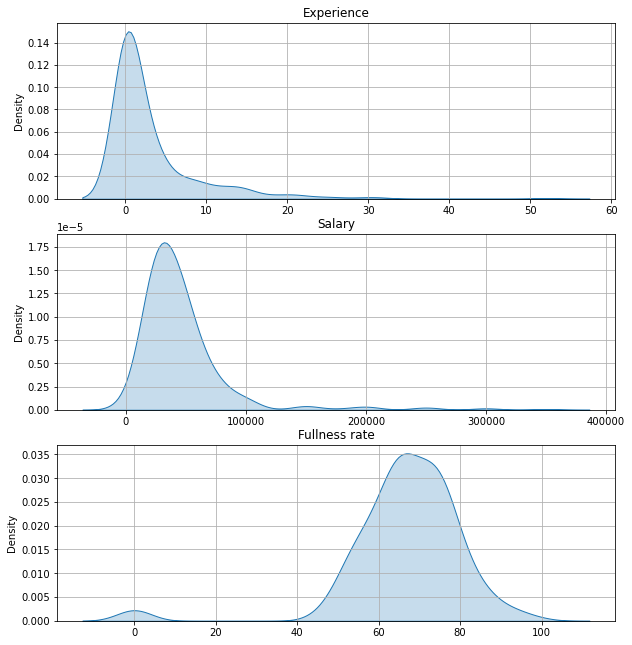

In [45]:
fig, ax =  plt.subplots(3,1, figsize=(10,11))

for i in range(3):
    sns.kdeplot(data=df, x=num[i], ax=ax[i], fill=True).set_title(names_n[i])

for axis in ax.ravel():
    axis.grid()
    axis.set_xlabel('')

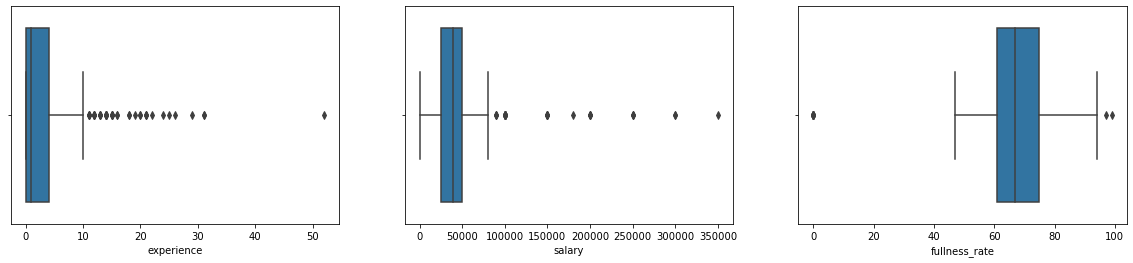

In [46]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

for i in range(3):
    sns.boxplot(data=df, x=num[i], ax=ax[i])

In [47]:
correlation = df[num].corr()
matrix = np.triu(correlation)

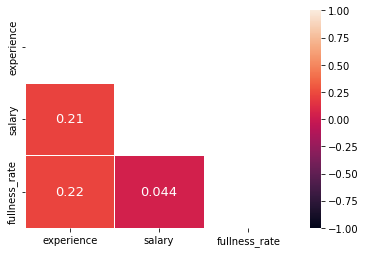

In [48]:
fig, ax = plt.subplots()

ax = sns.heatmap(correlation,
                annot=True,
                linecolor='white',
                linewidth=0.5,
                annot_kws={'size':13},
                vmin=-1, vmax=1,
                mask=matrix)

Мультиколлинеарности не наблюдается

Для лучшего представления нужны данные за полный период, за год, только за 2022 год данные полностью представлены, поэтому для визуализации переменных во времени буду использовать только 2022 год

In [49]:
df_2022 = df[df['published_date'].dt.year==2022]

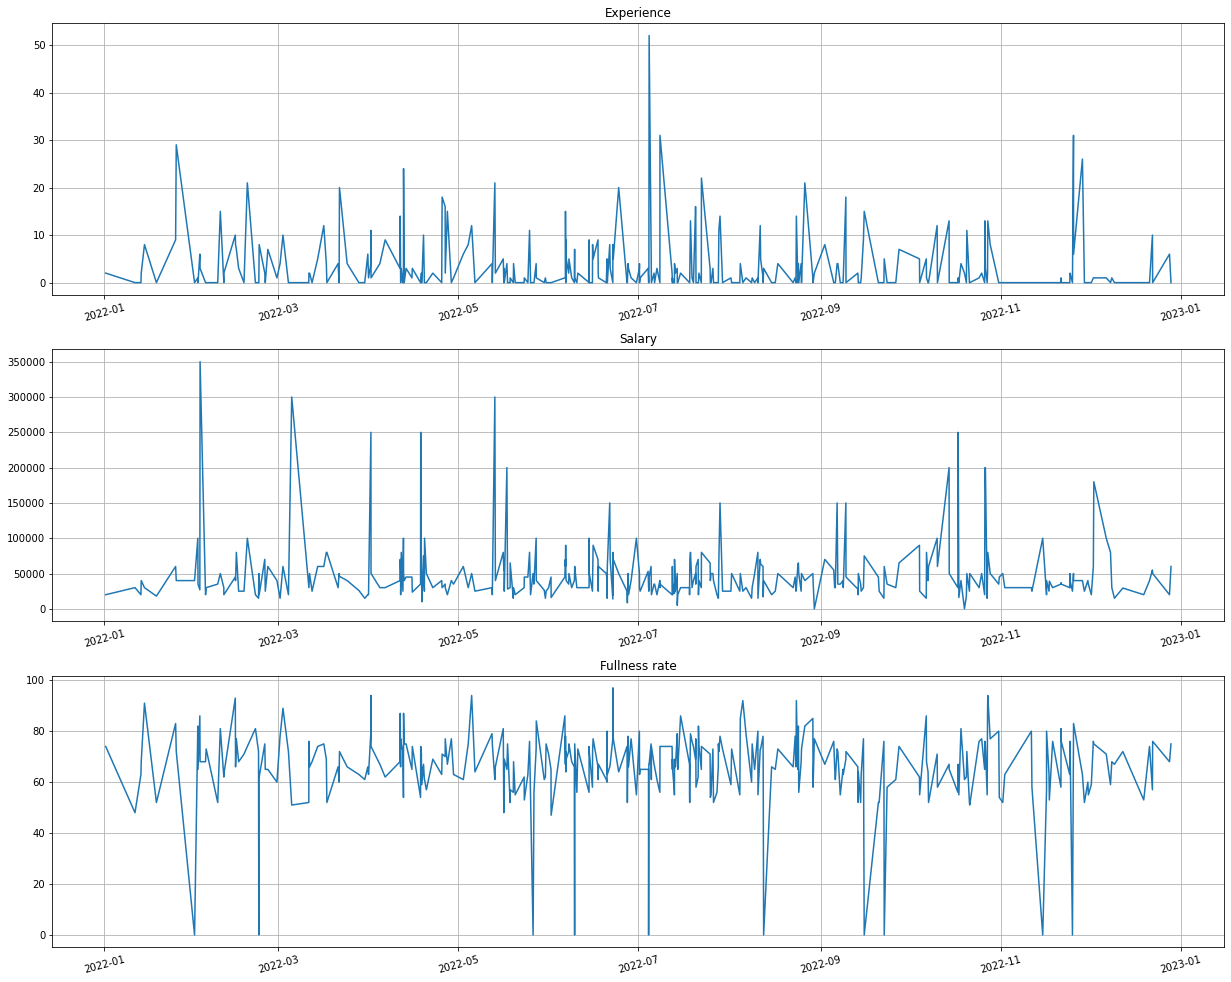

In [50]:
fig, ax = plt.subplots(3,1,figsize=(21,17))

for i in range(3):
    sns.lineplot(data=df_2022, x='published_date', y=num[i], ax=ax[i]).set_title(names_n[i])

for axis in ax.ravel():
    axis.grid()
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_xlabel('')
    axis.set_ylabel('')

Теперь визуализация номинативных переменных

In [51]:
names_c = ['Worldskills inspection status', 'State region code', 'Position name', 'Education', 'Drive license',
          'Nark inspection status', 'Nark certificate', 'Schedule type', 'Busy type', 'Business trip',
          'Retraining capability', 'Locality name']

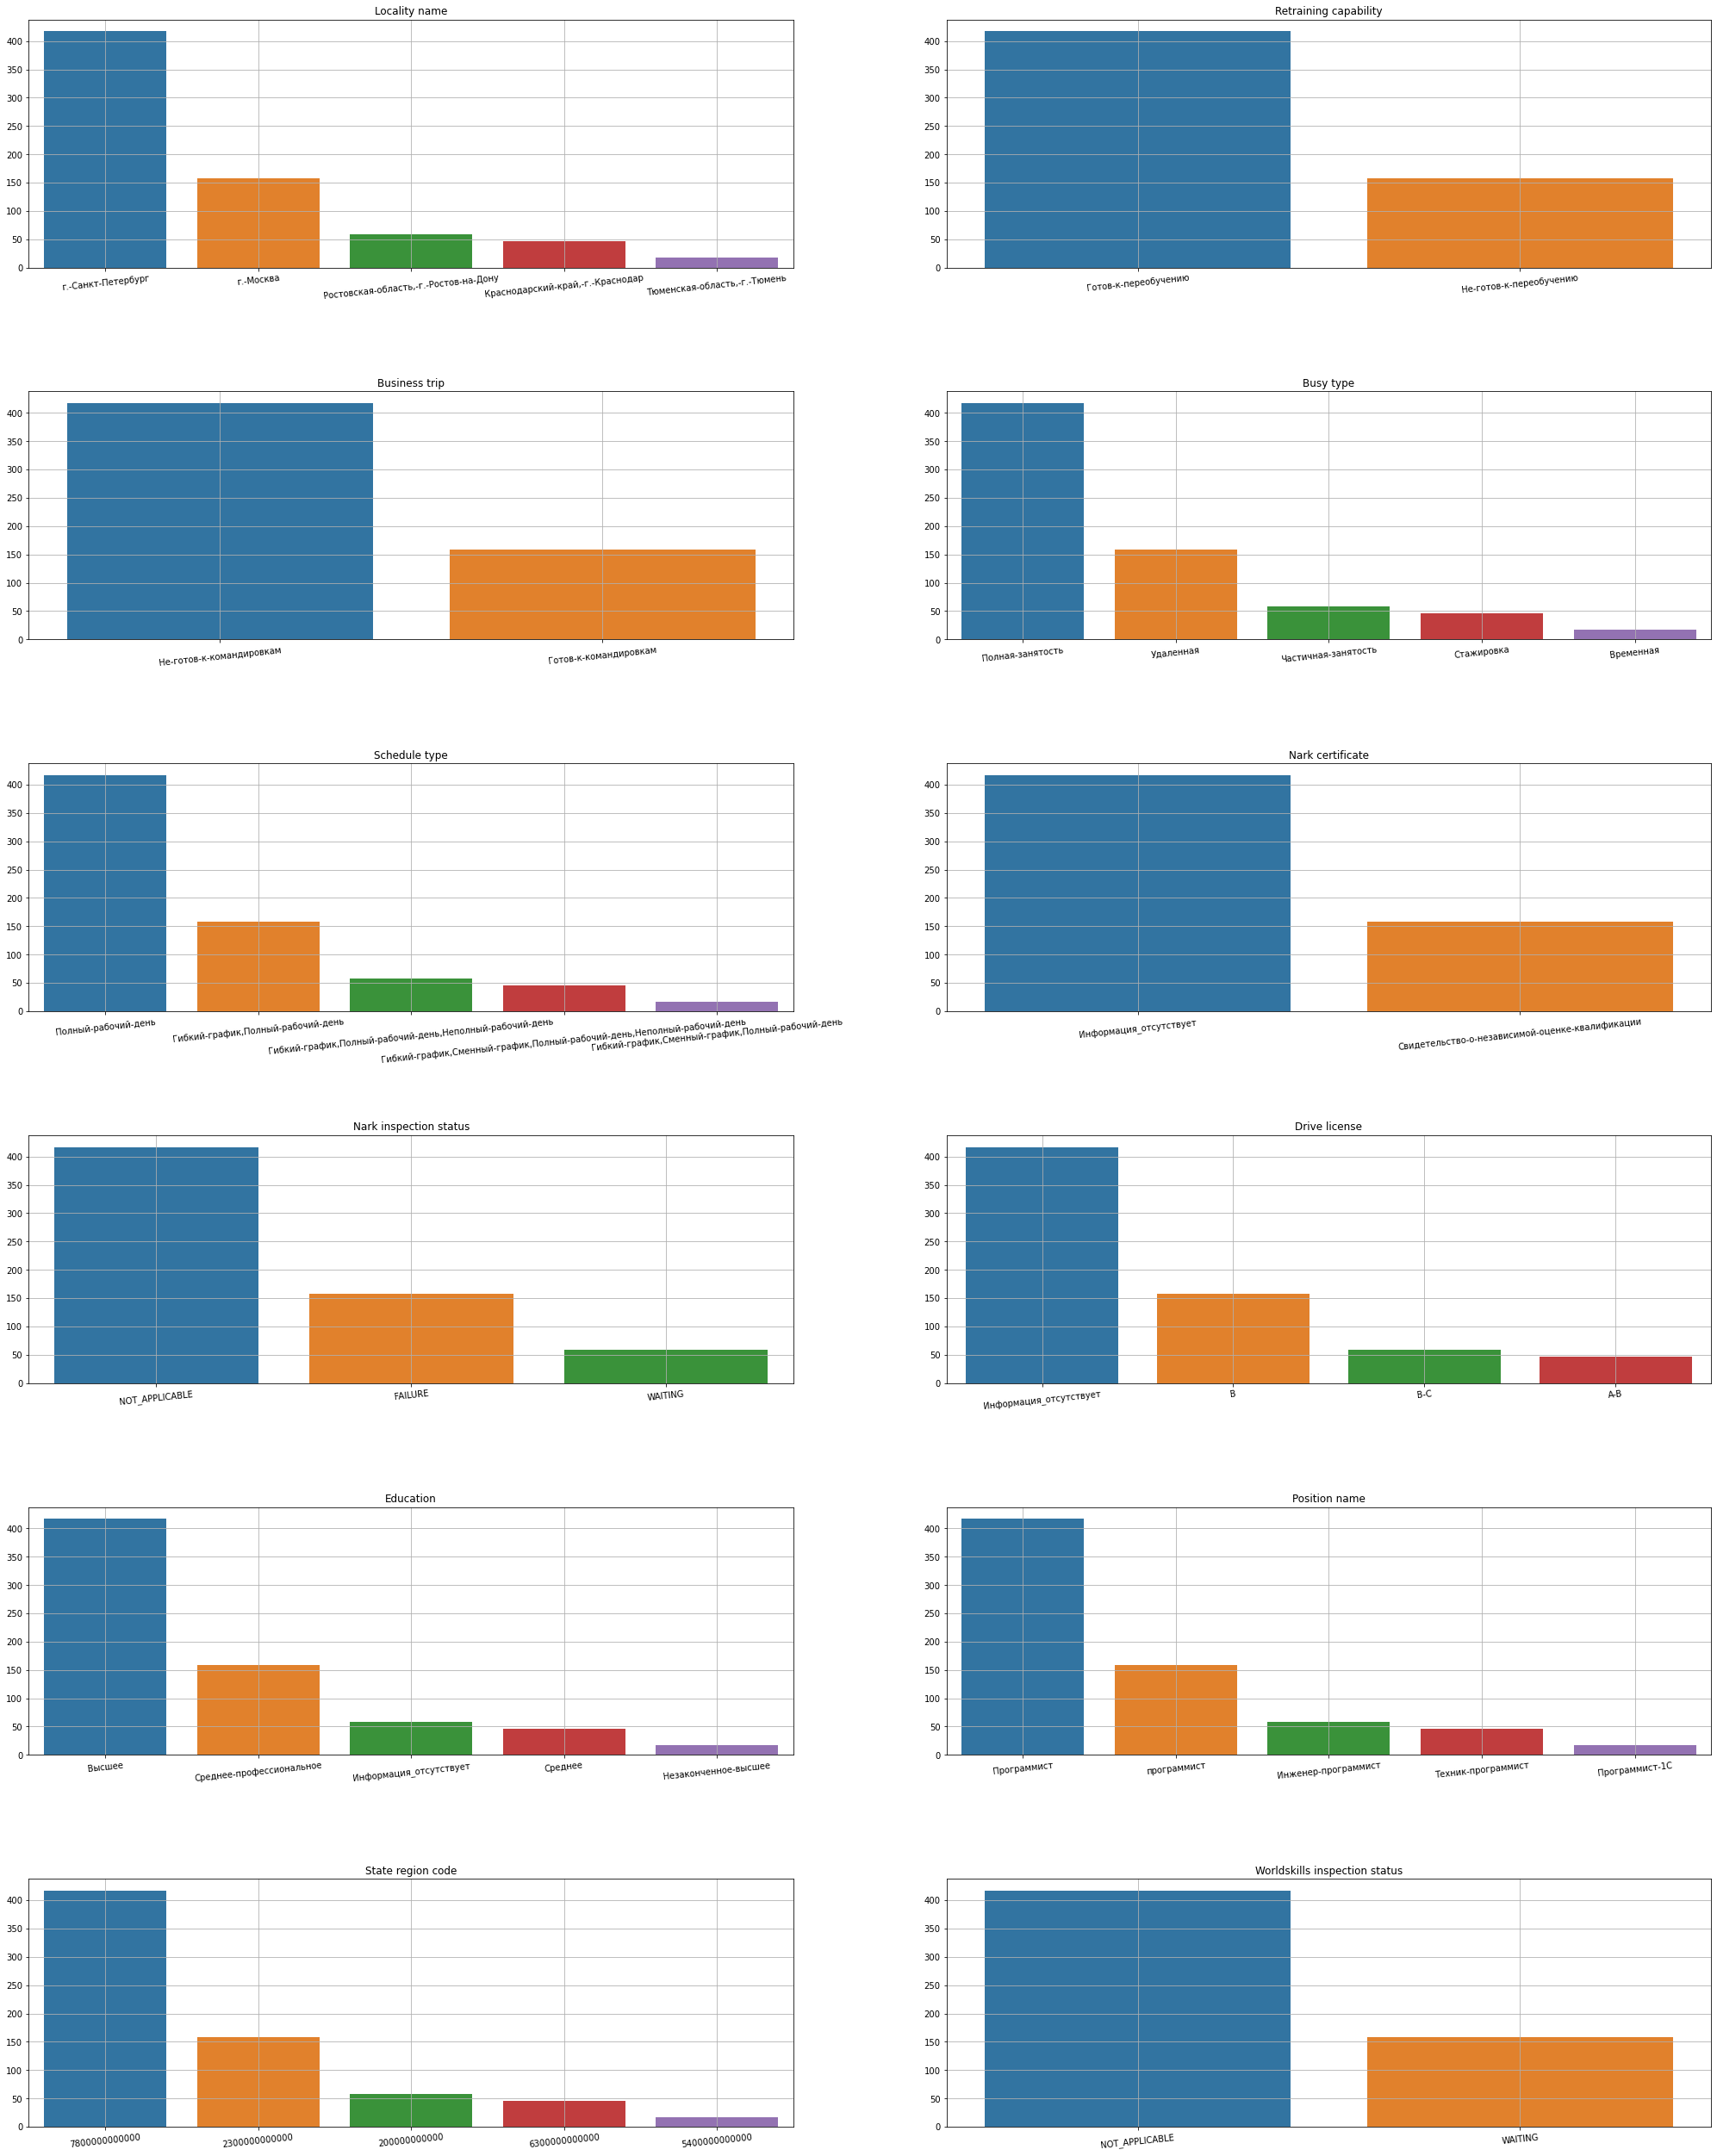

In [52]:
fig, ax = plt.subplots(6,2, figsize=(35,45))

for i in range(12):
    for r in range(6):
        for c in range(2):
            sns.countplot(data=df, x=cat[i], order=df[cat[i]].value_counts().head(5).index, ax=ax[r,c]).set_title(names_c[i])
            i-=1
            
for axis in ax.ravel():
    axis.grid()
    axis.tick_params(axis='x', labelrotation=6)
    axis.set_xlabel('')
    axis.set_ylabel('')
    plt.subplots_adjust(hspace=0.5)

Text(0.5, 1.0, 'Abilympics participation')

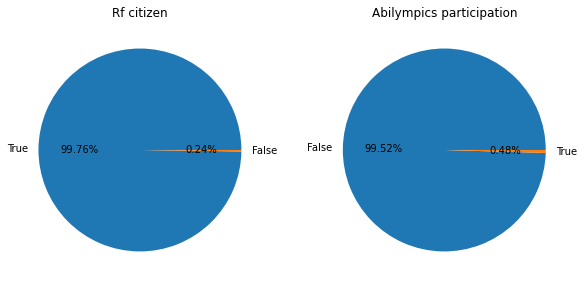

In [53]:
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].pie(df['rf_citizen'].value_counts().values, labels=df['rf_citizen'].unique(), autopct='%.2f%%')
ax[1].pie(df['abilympics_participation'].value_counts().values, labels=df['abilympics_participation'].unique(), autopct='%.2f%%')

ax[0].set_title('Rf citizen')
ax[1].set_title('Abilympics participation')

Теперь я буду менять переменные для построения модели, т.к. ранее я их менял для более понятного отображения

Преобразую в int бинарные переменные

In [54]:
df['abilympics_participation'] = df['abilympics_participation'].apply(lambda x: 1 if x==True else 0)
df['rf_citizen'] = df['rf_citizen'].apply(lambda x: 1 if x==True else 0)

Теперь некоторые категориальные переменные сделаю бинарными с 0 и 1

In [55]:
df['applicable_worldskills_inspection_status'] = df['worldskills_inspection_status'].apply(lambda x: 1 if x=='WAITING' else 0)
df.drop(columns='worldskills_inspection_status', inplace=True)

In [56]:
df['business_trip_ready'] = df['business_trip'].apply(lambda x: 1 if x=='Готов-к-командировкам' else 0)
df.drop(columns='business_trip', inplace=True)

In [57]:
df['retraining_capability_ready'] = df['retraining_capability'].apply(lambda x: 1 if x=='Готов-к-переобучению' else 0)
df.drop(columns='retraining_capability', inplace=True)

К тому же можно убрать переменные drive_license и nark_certificate, т.к. в них большее количество - это пропуски; переменные с id (id, id_candidate, id_user); переменные, отвечающие за дату и время (date_create, date_modify), т.к. для построения модели они не несут смысловой нагрузки (переменную published_date можно оставить и перекодировать ее); переменные, отвечающие за произвольный текст (professional_skills, add_skills, other_certificates, other_info, professionList, workExperienceList, educationList, additionalEducationList, desirableRelocationRegions, contactList, worldskills, languageKnowledge, hardSkills, softSkills), а также переменную state_region_code, потому что не понимаю, за что она отвечает

In [58]:
df.drop(columns=['drive_license','nark_certificate','id','id_candidate','id_user','date_create','date_modify',
                 'professional_skills','add_skills','other_certificates','other_info','professionList',
                 'workExperienceList','educationList','additionalEducationList','desirableRelocationRegions','contactList',
                 'worldskills','languageKnowledge','hardSkills','softSkills','state_region_code'], inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 424
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   abilympics_participation                  421 non-null    int64         
 1   position_name                             421 non-null    object        
 2   education                                 421 non-null    object        
 3   nark_inspection_status                    421 non-null    object        
 4   published_date                            421 non-null    datetime64[ns]
 5   schedule_type                             421 non-null    object        
 6   experience                                421 non-null    int64         
 7   salary                                    421 non-null    int64         
 8   busy_type                                 421 non-null    object        
 9   rf_citizen                      

In [60]:
df.head()

,abilympics_participation,position_name,education,nark_inspection_status,published_date,schedule_type,experience,salary,busy_type,rf_citizen,fullness_rate,localityName,applicable_worldskills_inspection_status,business_trip_ready,retraining_capability_ready
0,0,Техник-программист,Среднее-профессиональное,NOT_APPLICABLE,2021-11-30 10:50:53,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,Полная-занятость,1,79,"Ростовская-область,-г.-Ростов-на-Дону",0,1,1
1,0,Программист,Среднее,NOT_APPLICABLE,2021-11-28 19:18:18,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,Полная-занятость,1,69,г.-Санкт-Петербург,0,0,1
2,0,Программист,Среднее,NOT_APPLICABLE,2022-07-29 14:04:11,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,Удаленная,1,73,"Оренбургская-область,-г.-Медногорск",0,0,1
3,0,Программист,Информация_отсутствует,NOT_APPLICABLE,2022-11-17 09:21:38,Полный-рабочий-день,0,39157,Полная-занятость,1,53,"Республика-Татарстан,-г.-Казань",0,0,1
4,0,Техник-программист,Среднее-профессиональное,NOT_APPLICABLE,2022-05-31 14:37:13,Сменный-график,0,30000,Частичная-занятость,1,71,"Орловская-область,-г.-Новосиль",0,0,0


В датасете присутствуют желаемые позиции, можно заметить, что для одной позиции может быть несколько названий, которые будут незначительно различаться

In [61]:
df['position_name'].unique()

array(['Техник-программист', 'Программист', 'Инженер---программист-C/C++',
       'Техник-Программист', 'программист',
       'Программист,-системный-администратор,-IT-Специалист.-Водитель-категории-В,-Водитель-экспедитор.-Слесарь,-по-ремонту-техники.',
       'Инженер-программист-АСУ-ТП', 'Инженер-технолог-программист',
       'Инженер-программист-АСУ-ТП-(SCADA),-Инженер-метролог',
       'Помощник-программиста',
       'наладчик-станков-с-ЧПУ-6-разряда,-технолог-программист-станков-с-ЧПУ',
       'Младший-инженер-программист', 'Начинающий-программист',
       'Инженер-программист', 'Программист-1С',
       'Программист-сайтов-на-1С-Битрикс', 'Программист-C#',
       'инженер-программист',
       'инженер-технической-поддержки-/-службы,-эникейщик,-системный-администратор-(помощник-/-стажёр),-программист-(стажёр)',
       'Инженер-программист-АСУТП', 'Помошник-программиста',
       'программист,-специалист',
       'Разработчик-БД,-программист,-аналитик,-менеджер-проектов',
       'Про

Все виды записи одной позиции для всех позиций: просто программист, Техник техник технолог, Инженер инженер, 1, С, java Java, Python python, web WEB Web веб Веб, стажер Стажер стажёр Помощник Помошник начинающий Стажёр

Может быть такая ситуация, что человек будет попадать одновременно под несколько категорий, это можно решить путем расставления приоритета определения человека на определенную позицию. Буду обрабатывать значения в порядке приоритетности

In [62]:
df.loc[df['position_name'].str.contains('стажер|Стажер|Стажёр|стажёр|Помощник|Помошник|помощник|начинающий|Начинающий|Junior|junior|Младший'), 'position_name'] = 'trainee_junior_programmer'

In [63]:
df.loc[df['position_name'].str.contains('Инженер|инженер'), 'position_name']='engineer_programmer'

In [64]:
df.loc[df['position_name'].str.contains('Техник|техник|технолог'), 'position_name']='technician_programmer'

In [65]:
df.loc[df['position_name'].str.contains('web|WEB|Web|веб|Веб'), 'position_name']='web_programmer'

In [66]:
df.loc[df['position_name'].str.contains('1|Python|Java|java|C'), 'position_name']='language_programmer'

In [67]:
df.loc[df['position_name'].str.contains('Программист|программист'), 'position_name']='programmer'

Для преобразования графика буду использовать за целевое значение то, которое встречается первым в указанных видах графиков

In [68]:
df.loc[df['schedule_type'].str.startswith('Полный-рабочий-день'), 'schedule_type']='Полный-рабочий-день'

In [69]:
df.loc[df['schedule_type'].str.startswith('Гибкий-график'), 'schedule_type']='Гибкий-график'

In [70]:
df.loc[df['schedule_type'].str.startswith('Сменный-график'), 'schedule_type']='Сменный-график'

In [71]:
df.loc[df['schedule_type'].str.startswith('Ненормированный-рабочий-день'), 'schedule_type']='Ненормированный-рабочий-день'

In [72]:
df.loc[df['schedule_type'].str.startswith('Неполный-рабочий-день'), 'schedule_type']='Неполный-рабочий-день'

Теперь преобразую города, где выделю крупные города отдельно

In [73]:
df.loc[df['localityName'].str.endswith('г.-Санкт-Петербург'), 'localityName']='Saint_Petersburg'

In [74]:
df.loc[df['localityName'].str.endswith('г.-Москва'), 'localityName']='Moscow'

In [75]:
df.loc[(df['localityName']!='Saint_Petersburg')&(df['localityName']!='Moscow'),'localityName']='Other_city'

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 424
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   abilympics_participation                  421 non-null    int64         
 1   position_name                             421 non-null    object        
 2   education                                 421 non-null    object        
 3   nark_inspection_status                    421 non-null    object        
 4   published_date                            421 non-null    datetime64[ns]
 5   schedule_type                             421 non-null    object        
 6   experience                                421 non-null    int64         
 7   salary                                    421 non-null    int64         
 8   busy_type                                 421 non-null    object        
 9   rf_citizen                      

In [77]:
df.head()

,abilympics_participation,position_name,education,nark_inspection_status,published_date,schedule_type,experience,salary,busy_type,rf_citizen,fullness_rate,localityName,applicable_worldskills_inspection_status,business_trip_ready,retraining_capability_ready
0,0,technician_programmer,Среднее-профессиональное,NOT_APPLICABLE,2021-11-30 10:50:53,Сменный-график,2,30000,Полная-занятость,1,79,Other_city,0,1,1
1,0,programmer,Среднее,NOT_APPLICABLE,2021-11-28 19:18:18,Гибкий-график,14,30000,Полная-занятость,1,69,Saint_Petersburg,0,0,1
2,0,programmer,Среднее,NOT_APPLICABLE,2022-07-29 14:04:11,Гибкий-график,0,25000,Удаленная,1,73,Other_city,0,0,1
3,0,programmer,Информация_отсутствует,NOT_APPLICABLE,2022-11-17 09:21:38,Полный-рабочий-день,0,39157,Полная-занятость,1,53,Other_city,0,0,1
4,0,technician_programmer,Среднее-профессиональное,NOT_APPLICABLE,2022-05-31 14:37:13,Сменный-график,0,30000,Частичная-занятость,1,71,Other_city,0,0,0


Для столбца published_date изменю каждую дату на день недели, чтобы в дальнейшем делать прогнозирование относительно дня недели (можно попробовать посмотреть не по дням недели, а по месяцам)

In [78]:
df['published_date'] = df['published_date'].dt.day_name()

Теперь преобразую номинативные переменные

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 424
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   abilympics_participation                  421 non-null    int64 
 1   position_name                             421 non-null    object
 2   education                                 421 non-null    object
 3   nark_inspection_status                    421 non-null    object
 4   published_date                            421 non-null    object
 5   schedule_type                             421 non-null    object
 6   experience                                421 non-null    int64 
 7   salary                                    421 non-null    int64 
 8   busy_type                                 421 non-null    object
 9   rf_citizen                                421 non-null    int64 
 10  fullness_rate                             421 non-

In [80]:
df.head()

,abilympics_participation,position_name,education,nark_inspection_status,published_date,schedule_type,experience,salary,busy_type,rf_citizen,fullness_rate,localityName,applicable_worldskills_inspection_status,business_trip_ready,retraining_capability_ready
0,0,technician_programmer,Среднее-профессиональное,NOT_APPLICABLE,Tuesday,Сменный-график,2,30000,Полная-занятость,1,79,Other_city,0,1,1
1,0,programmer,Среднее,NOT_APPLICABLE,Sunday,Гибкий-график,14,30000,Полная-занятость,1,69,Saint_Petersburg,0,0,1
2,0,programmer,Среднее,NOT_APPLICABLE,Friday,Гибкий-график,0,25000,Удаленная,1,73,Other_city,0,0,1
3,0,programmer,Информация_отсутствует,NOT_APPLICABLE,Thursday,Полный-рабочий-день,0,39157,Полная-занятость,1,53,Other_city,0,0,1
4,0,technician_programmer,Среднее-профессиональное,NOT_APPLICABLE,Tuesday,Сменный-график,0,30000,Частичная-занятость,1,71,Other_city,0,0,0


Построение моделей

In [81]:
X = df.drop(columns='salary')
y = df['salary']

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   abilympics_participation                  421 non-null    int64 
 1   position_name                             421 non-null    object
 2   education                                 421 non-null    object
 3   nark_inspection_status                    421 non-null    object
 4   published_date                            421 non-null    object
 5   schedule_type                             421 non-null    object
 6   experience                                421 non-null    int64 
 7   busy_type                                 421 non-null    object
 8   rf_citizen                                421 non-null    int64 
 9   fullness_rate                             421 non-null    int64 
 10  localityName                              421 non-

Для построения моделей не должно быть номинативных переменных, для всех таких переменных сделаю преобразование, где уникальные значения-1 будут кодированы 0 и 1 (-1 нужно, чтобы избежать мультиколлинеарности, из-за образовавшейся зависимости между переменными, что нарушает предположение о независимости, которое также необходимо для построения модели)

In [83]:
categorical = ['position_name','education','nark_inspection_status','published_date','schedule_type','busy_type','localityName']

In [84]:
X = pd.get_dummies(X, columns=categorical, drop_first=True)

In [85]:
X.head()

,abilympics_participation,experience,rf_citizen,fullness_rate,applicable_worldskills_inspection_status,business_trip_ready,retraining_capability_ready,position_name_language_programmer,position_name_programmer,position_name_technician_programmer,...,schedule_type_Ненормированный-рабочий-день,schedule_type_Неполный-рабочий-день,schedule_type_Полный-рабочий-день,schedule_type_Сменный-график,busy_type_Полная-занятость,busy_type_Стажировка,busy_type_Удаленная,busy_type_Частичная-занятость,localityName_Other_city,localityName_Saint_Petersburg
0,0,2,1,79,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
1,0,14,1,69,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,73,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,53,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,1,71,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0


Разделю датасет на обучающую и тестовую выборки во избежание переобучения

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((294, 34), (127, 34))

Можно заметить, что значения некоторых переменных сильно различаются, поэтому нужно масштабировать переменные

In [87]:
cols = X_train.columns

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

Посмотрю насколько переменные коррелируют между собой

In [90]:
correlation_new = X_train.corr()
matrix_new = np.triu(correlation_new)

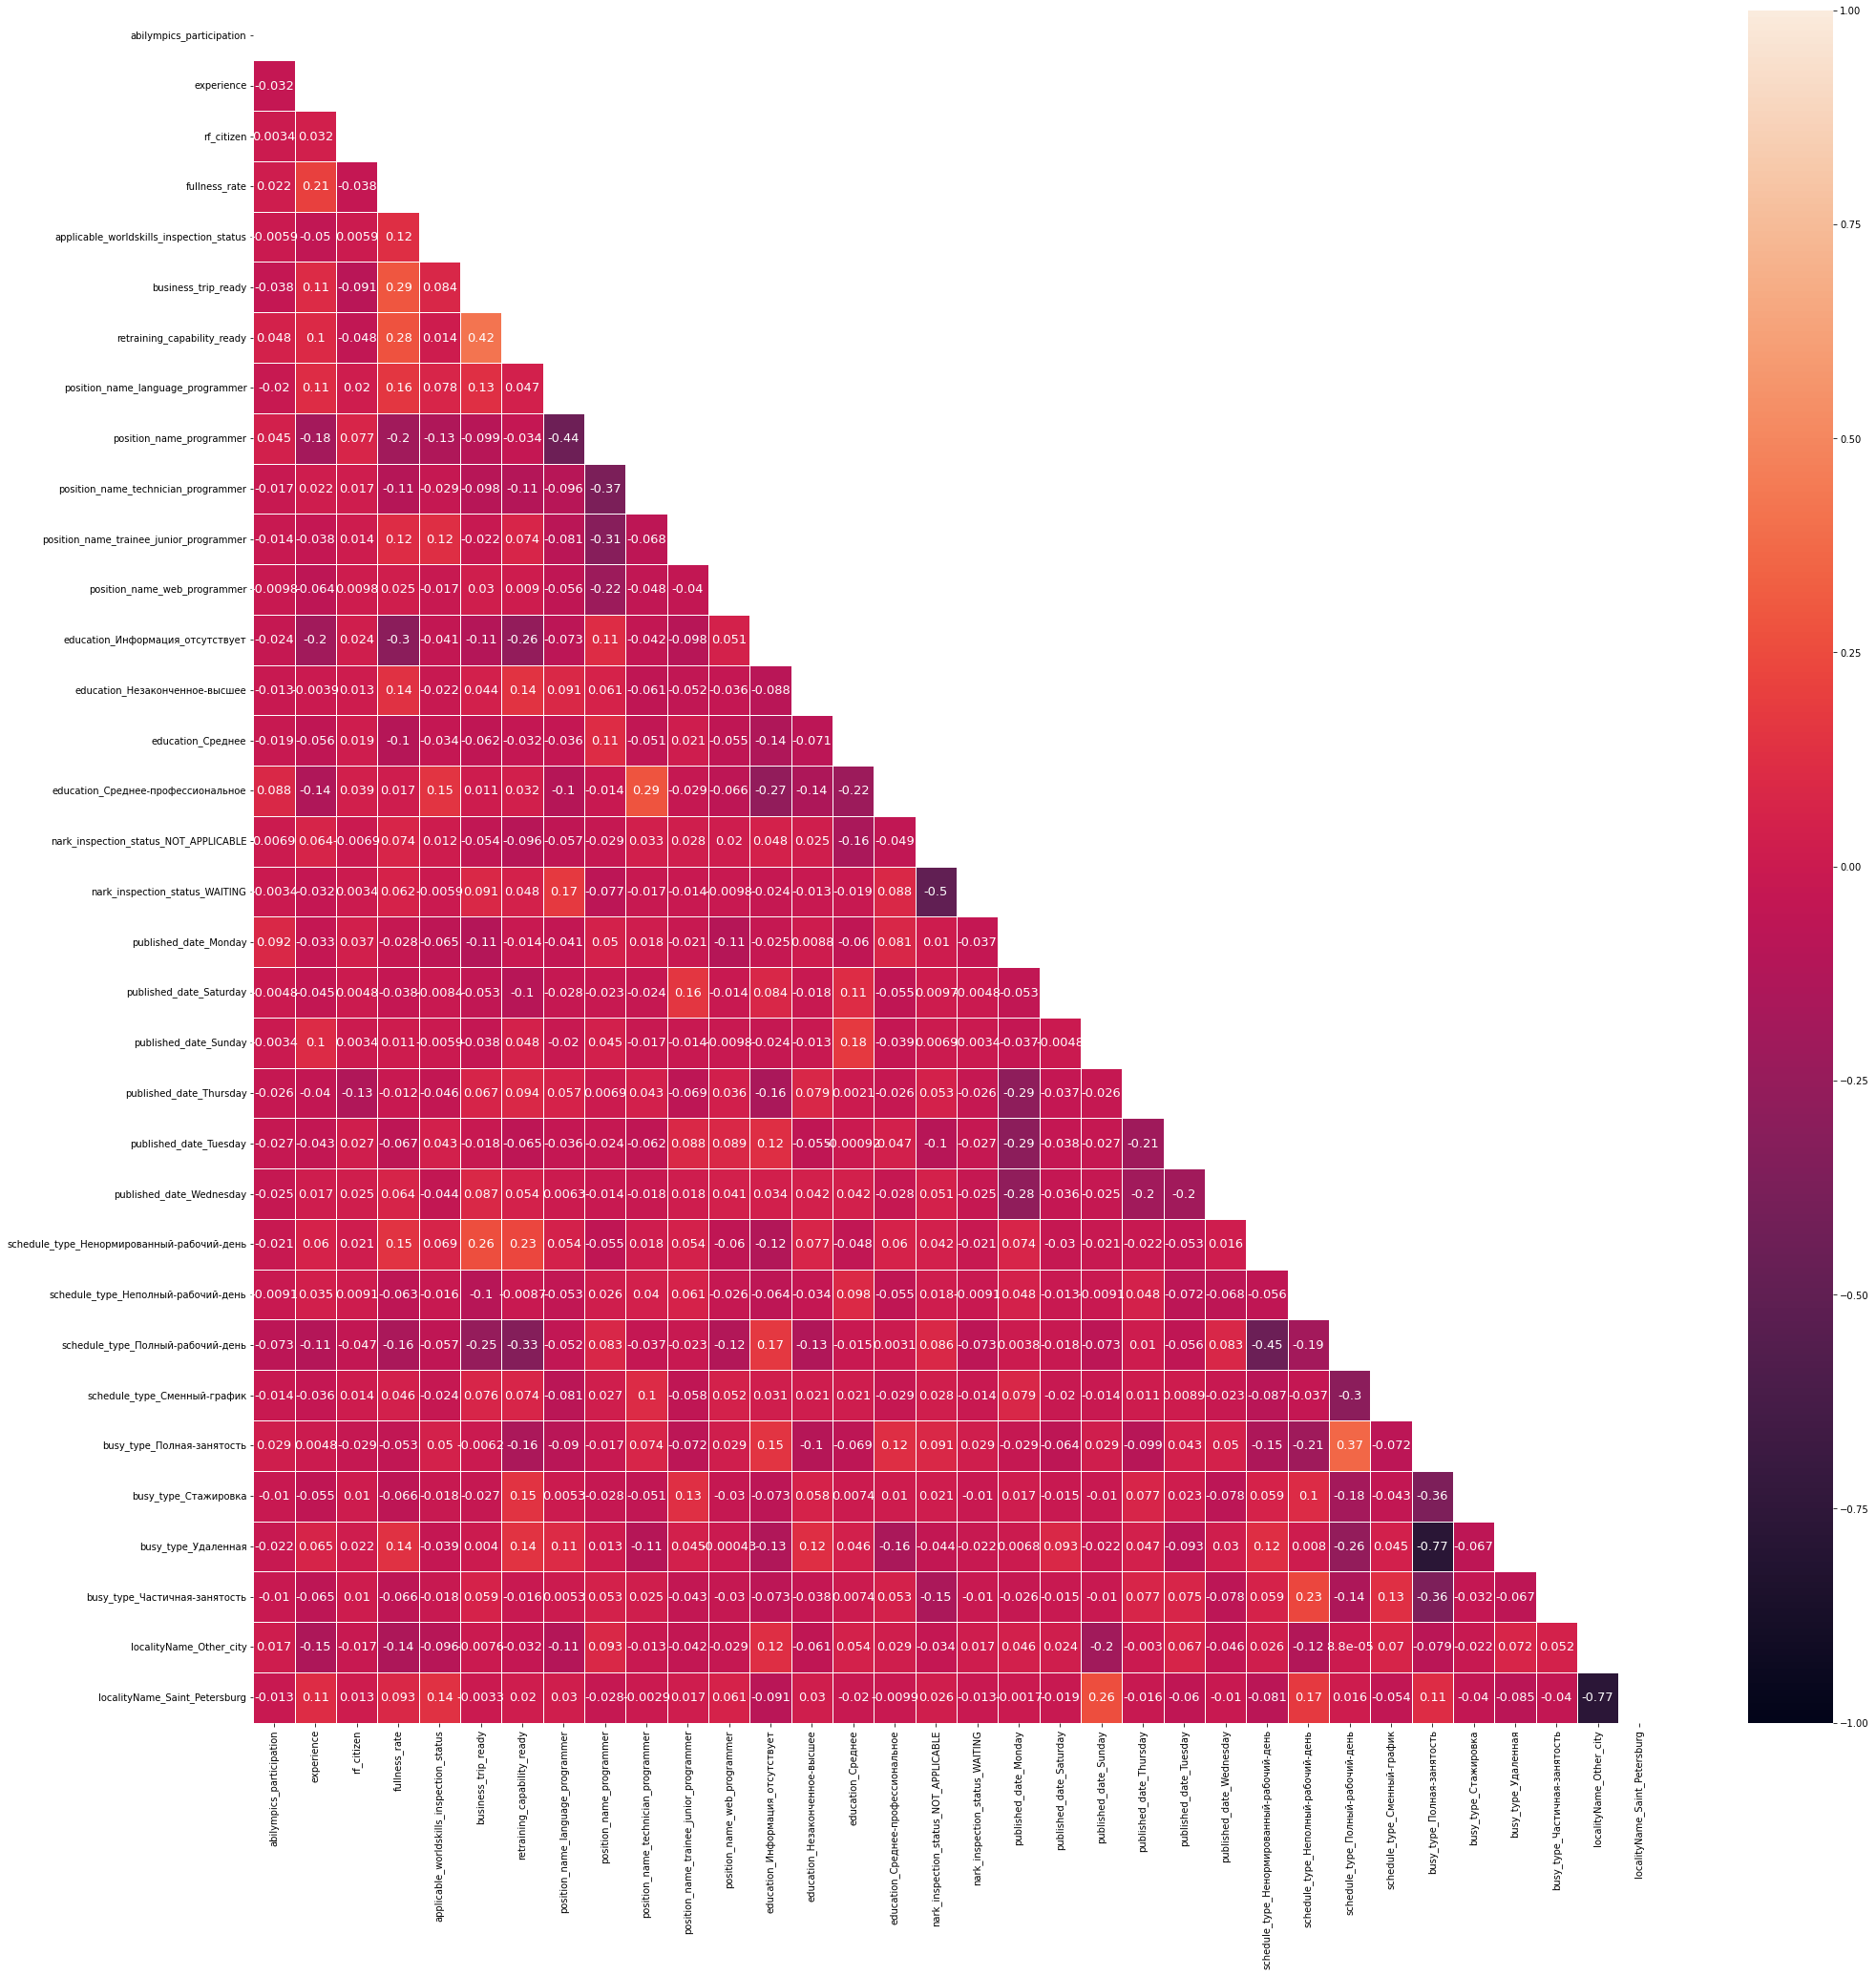

In [91]:
fig, ax = plt.subplots(figsize=(33,33))

ax = sns.heatmap(correlation_new,
                annot=True,
                linecolor='white',
                linewidth=0.5,
                annot_kws={'size':13},
                vmin=-1, vmax=1,
                mask=matrix_new)

Видно, что есть две пары переменных, сильно коррелирующих между собой

Теперь посмотрю нужны ли все переменные для анализа (т.к. понижение размерности может увеличить скорость работы, а также качество модели)

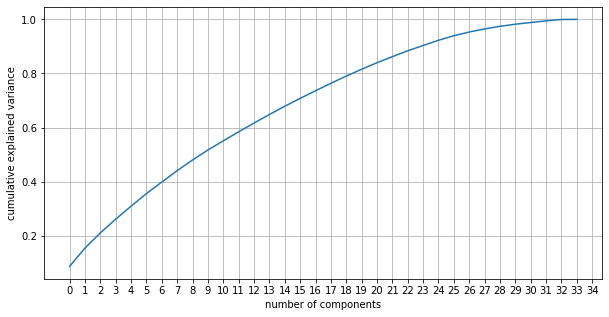

In [92]:
pca_test = PCA(n_components=34)
pca_test.fit(X_train)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(0,35))
plt.grid()

Можно видеть, что при 32 компонентах график выходит на плато, что говорит о том, что, грубо говоря, 33 и 34 компоненты не вносят существенный вклад в объяснение дисперсии

In [93]:
pca_test.explained_variance_ratio_

array([0.08610018, 0.06796055, 0.05595976, 0.05079723, 0.04814672,
       0.04666993, 0.04261145, 0.04212052, 0.03946332, 0.0369458 ,
       0.03389979, 0.03327695, 0.03253378, 0.03155407, 0.03061403,
       0.02901344, 0.02827249, 0.02750754, 0.02676538, 0.02532585,
       0.02414713, 0.02244072, 0.02165233, 0.0195393 , 0.01932877,
       0.01673631, 0.01387801, 0.01127208, 0.00976487, 0.00775757,
       0.0062488 , 0.00622704, 0.00494818, 0.00052007])

Можно посмотреть какой процент дисперсии будут объяснять 32 компоненты

In [94]:
np.cumsum(pca_test.explained_variance_ratio_)[31] * 100

99.45317539074435

Такой процент достаточно высокий, поэтому можно строить модели относительно 32 компонент

Также можно посмотреть количество компонент, необходимых для объяснения другого процента дисперсии

In [95]:
print('Минимальное количество компонент для объяснения 95% дисперсии = {}\n\
Минимальное количество компонент для объяснения 90% дисперсии = {}'
.format(np.argmax(np.cumsum(pca_test.explained_variance_ratio_) >= 0.95) + 1,
        np.argmax(np.cumsum(pca_test.explained_variance_ratio_) >= 0.90) + 1))

Минимальное количество компонент для объяснения 95% дисперсии = 27
Минимальное количество компонент для объяснения 90% дисперсии = 24


Уберу две переменные, как раз которые сильно коррелируют 

In [96]:
X_train.drop(columns=['localityName_Saint_Petersburg','busy_type_Удаленная'], inplace=True)
X_test.drop(columns=['localityName_Saint_Petersburg','busy_type_Удаленная'], inplace=True)

Построение моделей:

In [97]:
model = []
MAE = []
MSE = []
RMSE = []
R2_score = []

In [98]:
linear = LinearRegression()
linear.fit(X_train, y_train)

y_linear = linear.predict(X_test)


model.append('LR')
MAE.append(mean_absolute_error(y_test, y_linear))
MSE.append(mean_squared_error(y_test, y_linear))
RMSE.append(np.sqrt(mean_squared_error(y_test, y_linear)))
R2_score.append(r2_score(y_test, y_linear))

In [99]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_ridge = ridge.predict(X_test)


model.append('Ridge')
MAE.append(mean_absolute_error(y_test, y_ridge))
MSE.append(mean_squared_error(y_test, y_ridge))
RMSE.append(np.sqrt(mean_squared_error(y_test, y_ridge)))
R2_score.append(r2_score(y_test, y_ridge))

In [100]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_lasso = lasso.predict(X_test)


model.append('Lasso')
MAE.append(mean_absolute_error(y_test, y_lasso))
MSE.append(mean_squared_error(y_test, y_lasso))
RMSE.append(np.sqrt(mean_squared_error(y_test, y_lasso)))
R2_score.append(r2_score(y_test, y_lasso))

In [101]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

y_elastic_net = elastic_net.predict(X_test)


model.append('ElasictNet')
MAE.append(mean_absolute_error(y_test, y_elastic_net))
MSE.append(mean_squared_error(y_test, y_elastic_net))
RMSE.append(np.sqrt(mean_squared_error(y_test, y_elastic_net)))
R2_score.append(r2_score(y_test, y_elastic_net))

In [102]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

y_forest = forest.predict(X_test)


model.append('RandomForest')
MAE.append(mean_absolute_error(y_test, y_forest))
MSE.append(mean_squared_error(y_test, y_forest))
RMSE.append(np.sqrt(mean_squared_error(y_test, y_forest)))
R2_score.append(r2_score(y_test, y_forest))

Теперь оптимизирую гиперпараметры для случайного леса

In [103]:
forest_params = {'n_estimators': np.arange(50,401,50),
                'max_depth':np.arange(2,6),
                'min_samples_split':np.arange(2,11),
                'min_samples_leaf':np.arange(2,11)}

In [104]:
rs_forest = RandomizedSearchCV(forest, 
                               param_distributions=forest_params, 
                               cv=3, 
                               n_iter=100, 
                               random_state=42)
rs_forest.fit(X_train, y_train)
rs_forest.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_depth': 2}

In [105]:
best_forest = rs_forest.best_estimator_
y_best_forest = best_forest.predict(X_test)

model.append('BestRandomForest')
MAE.append(mean_absolute_error(y_test, y_best_forest))
MSE.append(mean_squared_error(y_test, y_best_forest))
RMSE.append(np.sqrt(mean_squared_error(y_test, y_best_forest)))
R2_score.append(r2_score(y_test, y_best_forest))

In [106]:
pd.DataFrame({'model':model,
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2_score})

,model,MAE,MSE,RMSE,R2_score
0,LR,20755.813359,9.890853e+08,31449.726168,-0.749954
1,Ridge,20709.501716,9.841314e+08,31370.868478,-0.741189
2,Lasso,20752.943093,9.888426e+08,31445.868486,-0.749524
3,ElasictNet,18315.621169,6.644562e+08,25777.047860,-0.175599
4,RandomForest,24130.659942,1.325955e+09,36413.667496,-1.345966
5,BestRandomForest,18653.164707,5.556669e+08,23572.588936,0.016878


По выбранной мною метрике RMSE лучшей моделью оказался оптимизированный случайный лес

Теперь можно посмотреть на первые 10 переменных, вносящих самый большой в порядке убывания вклад в предсказание модели

In [114]:
importances = pd.DataFrame({'feature': X_test.columns,
                           'importance': best_forest.feature_importances_})\
                           .sort_values(by='importance', ascending=False)

([], [])

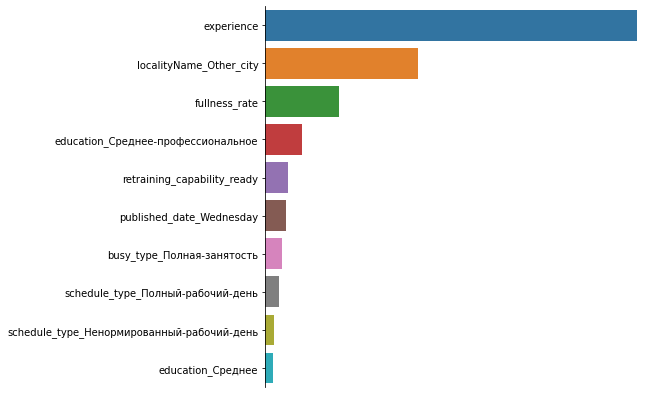

In [146]:
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(data=importances.head(10), x='importance', y='feature', orient='h')

sns.despine(bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])